(C) Gerold Baier, University College London, 2024

# Theory of Dynamical Systems

## Import Functions

Packages:
 
You will need Scipy, Numpy, Matplotlib. 

```conda install scipy```


In [1]:
from scipy.integrate import odeint

from numpy import tanh, gradient, linspace, ndarray
from numpy import around, arange, flip
from numpy.random import uniform

from matplotlib.pyplot import subplots


## Mathematical Model of a Neural Populations

Single Variable, first-order differential equation

The equation:

$$ \frac{dEx}{dt} = h_{ex} - Ex + c_1*tanh(Ex) $$

where $Ex$ is a variable that changes with time $t$, $h_{ex}$ and $c_1$ are model parameters, and `tanh` is the tangens hyperbolicus.

The equation is thought to represent a mesoscopic variable resulting from the mean of myriads of local cellular activities. Estimation: about 500,000 to 1,000,000 neurons under a single EEG contact.

We have a look at the impact a nonlinear function like the `tanh` has on the solutions of the equation. For this we use $c_1$ as a control parameter. For $c_1=0$, the model is linear, for   $c_1>0$, the model is nonlinear.

## Check Nonlinear Function

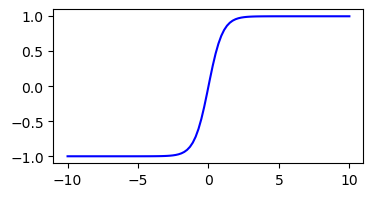

In [9]:
x_array = linspace(-10, 10, 100)

y_array = tanh(x_array)

fig, ax = subplots(figsize=(4, 2))

ax.plot(x_array, y_array, color='b');

# Function Definitions

In [8]:
def sigmoid(u):
    
    return tanh(u)

def one_oscillator(y, t, h_ex_0, c_1, variation):

    tau_ex = 1
    
    h_ex   = h_ex_0

    dydt = (
           (h_ex - y[0] + c_1*sigmoid(y[0]))*tau_ex,
   )

    return dydt


In [10]:
def plot_series(time, data, time_begin, time_end, sr):
        
    name_var = ('Ex')
    
    series      = data[time_begin*sr:time_end*sr]
    series_grad = gradient(data[time_begin*sr:time_end*sr], axis=0)
        
    fig, ax = subplots(figsize=(5, 3))

    ax.plot(time[time_begin*sr:time_end*sr], series, linewidth=2, c='b')
    ax.set_xticks(linspace(time_begin, time_end, 5));
    ax.set_xticklabels(linspace(time_begin, time_end, 5), fontsize=12);
    ax.set_xlabel('Time', fontsize=14);
    ax.set_ylabel(name_var, fontsize=14)
    y_min, y_max = ax.get_ylim()


    fig.tight_layout()
    
    return fig, ax


In [11]:
def run_bif_diagram(time_stop, sr, parset, y_ini, c_1, variation):

    time = linspace(start=0, stop=time_stop, num=time_stop*sr)
    
    results_max_f      = dict()
    results_max_inds_f = dict()
    results_min_f      = dict()
    results_min_inds_f = dict()
    
    rows = time.size
    
    num = 0
    # Simulation "forward"
    for par in par_set:
        
        y_f = odeint(func=one_oscillator, y0=y_ini, t=time, 
                 args=(par, c_1, variation), 
                 hmax=0.1)
     
        series = y_f[rows//2:]
                 
        if num not in results_max_f:
    
            results_max_f[num]      = [series[-1]]
            results_max_inds_f[num] = [0]    
            results_min_f[num]      = [series[-1]]
            results_min_inds_f[num] = [0]    
    
        else:
            results_max_f[num].append(series[-1])
            results_max_inds_f[num].append(0)    
            results_min_f[num].append(series[-1])
            results_min_inds_f[num].append(0)               
    
        y_ini = y_f[-1, :]
    
    
    results_max_b      = dict()
    results_max_inds_b = dict()
    results_min_b      = dict()
    results_min_inds_b = dict()
    
    
    # Simulation "backward"
    for par in flip(par_set):
        
        y_b = odeint(func=one_oscillator, y0=y_ini, t=time, 
                 args=(par, c_1, variation), 
                 hmax=0.1)
     
    
        series = y_b[rows//2:]
                
        if num not in results_max_b:
    
            results_max_b[num]      = [series[-1]]
            results_max_inds_b[num] = [0]    
            results_min_b[num]      = [series[-1]]
            results_min_inds_b[num] = [0]    
    
        else:
            results_max_b[num].append(series[-1])
            results_max_inds_b[num].append(0)    
            results_min_b[num].append(series[-1])
            results_min_inds_b[num].append(0)               
    
            
        y_ini = y_b[-1, :]
    
    return results_min_f, results_max_f, results_min_b, results_max_b


def plot_bifdiagram(results_min_f, results_max_f, 
                    results_min_b, results_max_b,
                    par_set, chars):
    
    N = len(results_min_f)

    fig, ax = subplots()

    for xe, ye in zip(par_set, results_max_f[0]):

        if not isinstance(ye, ndarray):
            ax.scatter(xe, ye, c='r', s=5)
        else:
            ax.scatter([xe] * len(ye), ye, c='b', s=50, marker='x')

    for xe, ye in zip(par_set, results_min_f[0]):

        if not isinstance(ye, ndarray):
            ax.scatter(xe, ye, c='r', s=5)
        else:
            ax.scatter([xe] * len(ye), ye, c='b', s=50, marker='x')

    for xe, ye in zip(flip(par_set), results_max_b[0]):

        if not isinstance(ye, ndarray):
            ax.scatter(xe, ye, c='r', s=5)
        else:
            ax.scatter([xe] * len(ye), ye, c='m', s=20, marker='P')

    for xe, ye in zip(flip(par_set), results_min_b[0]):

        if not isinstance(ye, ndarray):
            ax.scatter(xe, ye, c='r', s=5)
        else:
            ax.scatter([xe] * len(ye), ye, c='m', s=20, marker='P')

    ax.set_xticks(linspace(par_min, par_max, 5));
    ax.set_xticklabels(around(linspace(par_min, par_max, 5), 2), fontsize=16);
    ax.set_xlabel('Parameter', fontsize=16)

    ax.set_ylabel('Ex', fontsize=14)

    y_min, y_max = ax.get_ylim()

    ax.set_yticks(linspace(y_min, y_max, 3));
    ax.set_yticklabels(around(linspace(y_min, y_max, 3),1), fontsize=14);

    title_chars = 'Starts from: ' + chars
    fig.suptitle(title_chars, fontsize=16)

    fig.tight_layout()
    
    return fig, ax


# Time Series

Numerical simulation of the differential equation shows temporal evolution of the model variable(s).

Stable conditions lead to an asymptotic fixed point. This is the predicted observation because stability assures that it would be robust in the presence of environmental noise.


In [18]:
# Input parameter
h_ex_0 = 0

c_1 = 4 # 0 (linear); 1 (with gap); 4 (bistable)

# Speed of parameter change
variation = 0

# Initial conditions
y_ini = 5

# Time array
time_stop = 30
sr        = 100
time      = linspace(start=0, stop=time_stop, num=time_stop*sr)

# Simulation
y = odeint(func=one_oscillator, y0=y_ini, t=time, 
           args=(h_ex_0, c_1, variation), hmax=0.1)

# Show final values of all variables
print('Complete. Final value:', list(around(y[-1,:],3)))
print('')

Complete. Final value: [3.997]



figs/Timeseries_h_ex_0.png


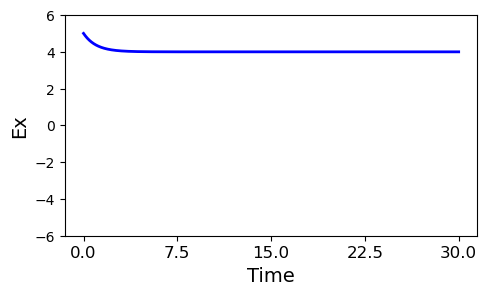

In [19]:
time_begin, time_end = 0, time_stop

fig, ax = plot_series(time, y, time_begin, time_end, sr)

ax.set_ylim(-6, 6)

title_chars = 'figs/Timeseries_h_ex_' + str(h_ex_0) + '.png'
# fig.savefig(title_chars, format='png')
print(title_chars)

# Bifurcation Diagram

The bifurcation diagram displays the asymptotic dynamics as a function of one model parameter. It summarises the outcome of many simulations and typically tries to exclude transient behaviour.


In [20]:
# Initial conditions
y_ini = y[-1, :]

# Bifurcation parameter range
steps = 30
par_min, par_max = -3, 3

par_set = linspace(par_min, par_max, steps)

# Stop time
time_stop = 100

results_min_f, results_max_f, results_min_b, results_max_b = run_bif_diagram(time_stop, sr, par_set, y_ini, c_1, variation)

print('Scan complete!')
print('')


Scan complete!



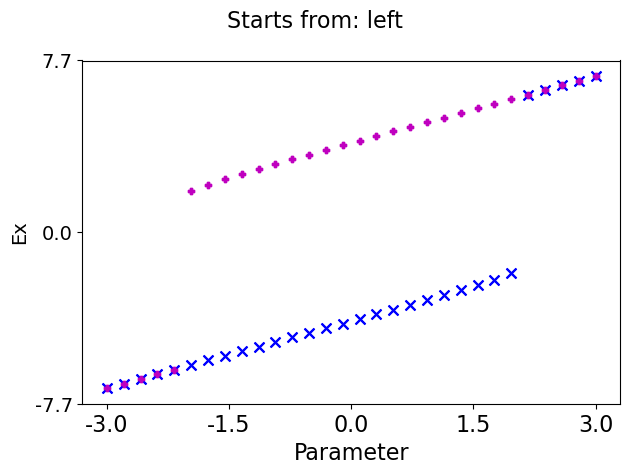

In [21]:
# Plot
if par_max < par_min:
    
    direct = 'right'
    
else:
    
    direct = 'left'
    
fig, ax = plot_bifdiagram(results_min_f, results_max_f, 
                          results_min_b, results_max_b, par_set, direct)


# Conclusion

The nonlinearity allows new solutions that are not present in the linear model. We think today that all of biology, including brain acitvity, is fundamentally nonlinear. If the model was a valid approximation of voltage fluctations in the human brain, it would predict the possibility to have more than one state coexisting. This offers hypothesis like binary switches (with the possibility to go from one state to the other and back again) and also a simple memory. 

In the next unit we will see that it also includes transient switches (similar to cellular action potentials) which form the basis of learning.

# Try It Yourself

- Replace the $tanh$ function in the model with other functions to test their impact on the bifurcation diagram. 

Examples: 
$x^2$, $x^3$, $sin(x)$, $log(x)$, $1/(1+exp(-x))$.

- As in the case of $tanh$, you can multiple the function with a control parameter to control its impact. 

- Modify the code to scan the control parameter instead of $h_{ex}$.

Please share results that look interesting.
